<a href="https://colab.research.google.com/github/Riyanchaudhary/Electricity-Load-Forecasting-Anomaly-Detection/blob/main/Load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving PJME_hourly.csv to PJME_hourly.csv


In [3]:
import pandas as pd
df = pd.read_csv('PJME_hourly.csv')
df.head()


,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [5]:

df = df.dropna()

df.columns = ['load']

df['hour'] = df.index.hour
df['day'] = df.index.day
df['weekday'] = df.index.weekday

df.head()


,load,hour,day,weekday
Datetime,,,,
2002-12-31 01:00:00,26498.0,1,31,1
2002-12-31 02:00:00,25147.0,2,31,1
2002-12-31 03:00:00,24574.0,3,31,1
2002-12-31 04:00:00,24393.0,4,31,1
2002-12-31 05:00:00,24860.0,5,31,1


In [6]:

X = df[['hour', 'day', 'weekday']]
y = df['load']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.3f}")



MAE: 3985.51
RMSE: 5074.81
R-squared: 0.375


In [12]:
average_load = df['load'].mean()
print("Average Load:", average_load)


Average Load: 32080.222830648156


In [13]:
error_percentage = (mae / average_load) * 100
print(f"Error Percentage: {error_percentage:.2f}%")


Error Percentage: 12.42%


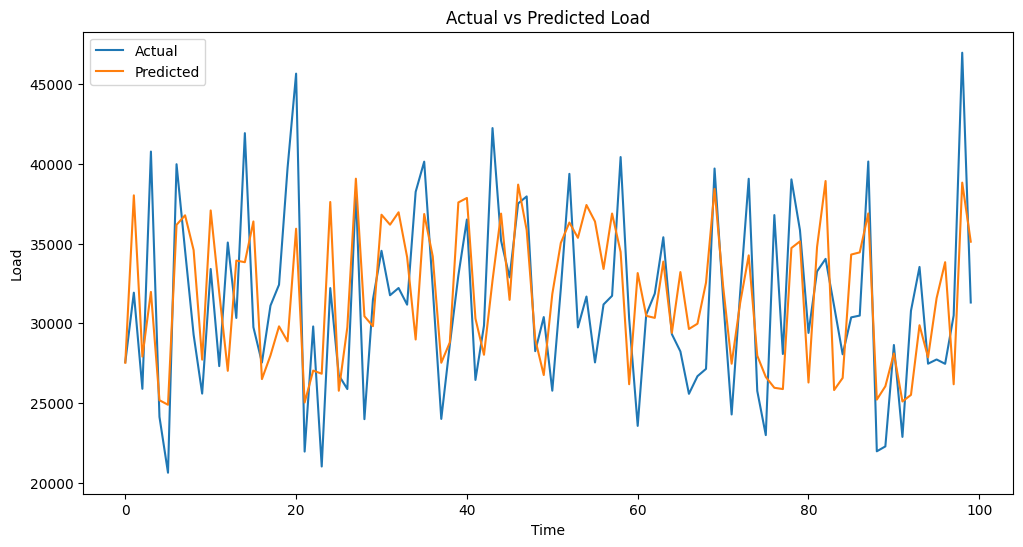

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Load")
plt.xlabel("Time")
plt.ylabel("Load")
plt.show()


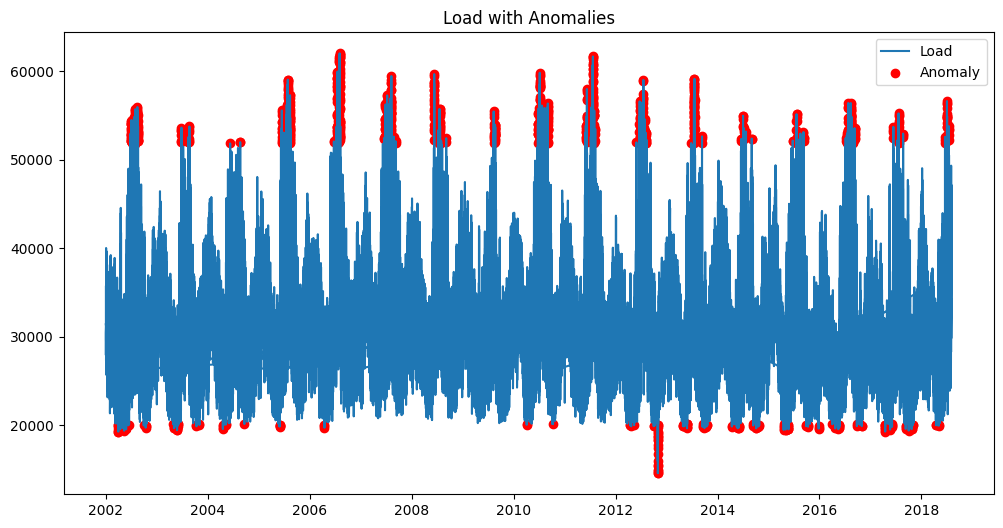

In [10]:
from sklearn.ensemble import IsolationForest


iso = IsolationForest(contamination=0.01)
df['anomaly'] = iso.fit_predict(df[['load']])

# -1 means anomaly
anomalies = df[df['anomaly'] == -1]

plt.figure(figsize=(12,6))
plt.plot(df.index, df['load'], label='Load')
plt.scatter(anomalies.index, anomalies['load'], color='red', label='Anomaly')
plt.legend()
plt.title("Load with Anomalies")
plt.show()
